# Домашнее задание на метод главных компонент (Principal Components Analysis, PCA)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Загрузите датасет fetch_olivetti_faces, выведите на экран 5-10 изображений. Изображения в датасете имеют размеры 64 на 64 пикселя, а хранятся в виде одномерного массива длиной 64 * 64, то есть для корректного вывода изображений на экран необходимо сделать reshape.

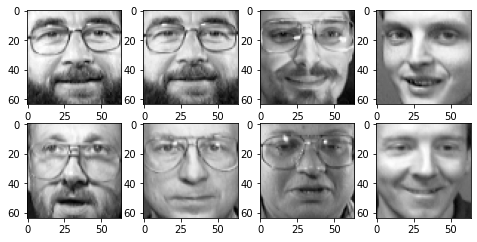

In [23]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=11)
faces_images = faces.data
faces_ids = faces.target
image_shape = (64, 64)
    
#Your code is here
faces_images_show = faces_images.reshape(400,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(8):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(faces_images_show[i] , cmap = 'gray')
plt.show()

Примените к элементам датасета PCA и выведите на экран первые 5-10 главных компонент. Не забудьте центрировать данные.

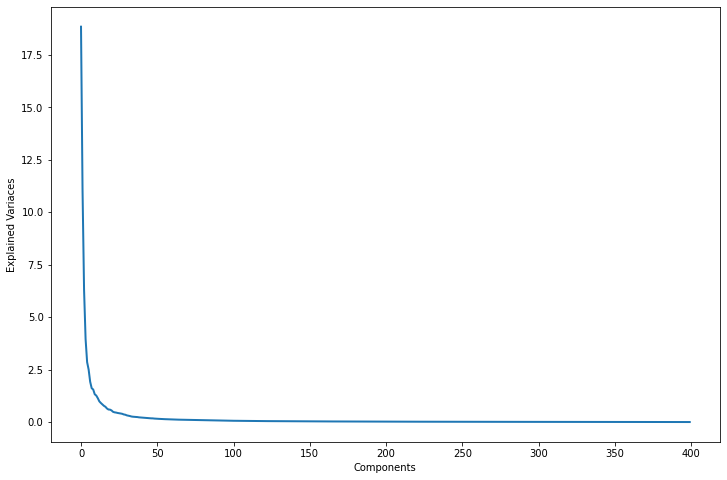

In [25]:
#Your code is here
pca=PCA()
pca.fit(faces_images)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [29]:
n_components=90

In [30]:
faces_centered = faces_images - faces_images.mean(axis=0)

pca=PCA(n_components=n_components, whiten=True)
pca.fit(faces_centered)

PCA(n_components=90, whiten=True)

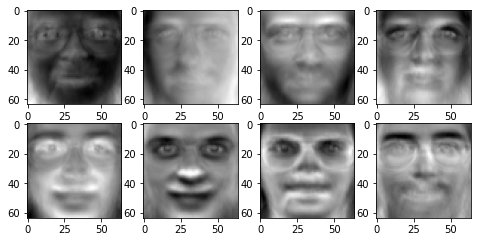

In [38]:
pca.components_.shape
faces_images_show_pca = pca.components_.reshape(90,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(8):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(faces_images_show_pca[i] , cmap = 'gray')
plt.show()

Давайте посмотрим, как изменится качество классификации, если использовать вместо старых признаков новые

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(),
                       {'n_estimators': [100, 200, 500, 800], 'max_depth': [2, 3, 4, 5]},
                       cv=5)

#Your code is here
X_pca=pca.transform(faces_centered)
clf.fit(X_pca,faces_ids)
#Сравните качество классификации на исходных изображениях и на восстановленных.


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 500, 800]})

In [46]:
clf.best_estimator_, clf.best_score_

(RandomForestClassifier(max_depth=5, n_estimators=800), 0.9225)

In [47]:
clf.fit(faces_images,faces_ids)
clf.best_estimator_, clf.best_score_

(RandomForestClassifier(max_depth=5, n_estimators=800), 0.8149999999999998)

Сожмём изображения, оставив долю главных компонент, равную compress_ratio.

Вам необходимо сжать изображения с помощью PCA, а затем вывести на экран восстановленные после сжатия изображения.

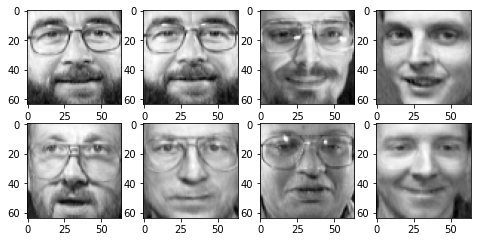

In [61]:
base_size = image_shape[0] * image_shape[1]

def compress_and_show(compress_ratio):
    red = PCA(n_components=int(base_size * compress_ratio))
    red.fit(faces_images)
    
    faces_compressed = red.transform(faces_images) #сжатые с помощью PCA данные
    faces_restored = red.inverse_transform(faces_compressed) #восстановленные после сжатия данные. Не забудьте к ним прибавить среднее, которое вы вычитали для центрирования.
    
    return faces_restored
    #Your code is here
    #Здесь вам нужно вывести на экран 5-10 изображений из faces_restored
    

restored = compress_and_show(0.05)
restored.shape
face_r = restored.reshape(400,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(8):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(face_r[i] , cmap = 'gray')
plt.show()

Подберите наименьший compress_ratio, при котором лица остаются узнаваемыми.

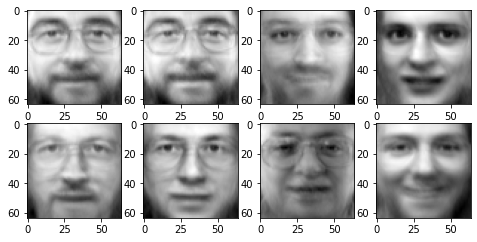

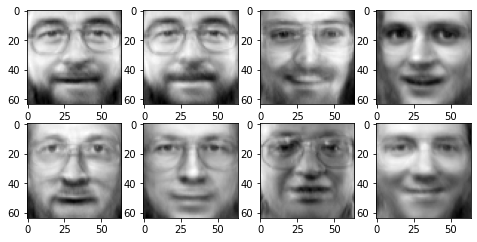

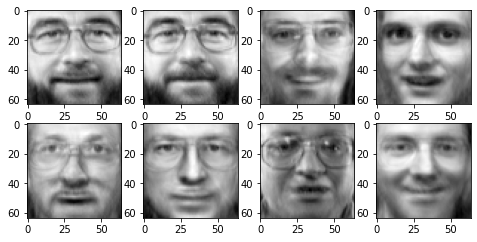

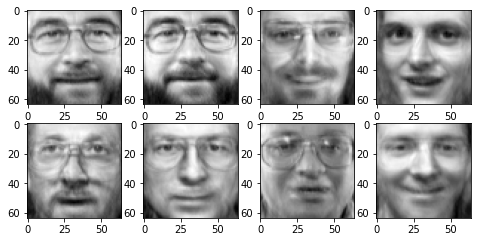

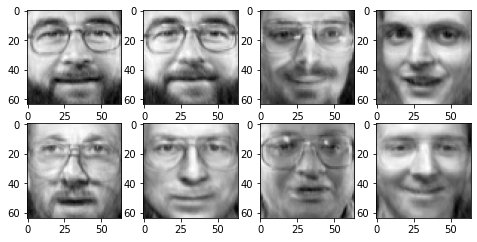

In [69]:
#Your code is here
n = 0.005
while n < 0.03:
    restored = compress_and_show(n)
    restored.shape
    face_r = restored.reshape(400,64,64)
    fig = plt.figure(figsize = (8,8))
    for i in range(8):
        ax = fig.add_subplot(4,4,i+1)
        ax.imshow(face_r[i] , cmap = 'gray')
    plt.show()
    n+=0.005

**Выводы:**

1) Напишите, как вы могли бы интерпретировать первые несколько главных компонент?

2) Как изменилось качество классификации при использовании PCA-признаков вместо исходных?

3) Какие полезные свойства PCA вы могли наблюдать на примере из данного ноутбука?

<ol>
<li>Выделение основных частей изображения (форма лица, глаза, граница рта, нос и т.д.)</li>
<li>Качество классификации повысилось с 0.81 до 0.92</li>
<li>Простота использования метода PCA, хороший прирост качества классификации после использования МГК, возможность восстановления данных после сжатия.</li>
</ol>
